## 1. "optimal_alpha" in PCMCI

### In PCMCI, the algorithm will optimize pc_alpha like this:
"pc_alpha : float or list of floats, default: [0.05, 0.1, 0.2, ..., 0.5] . pc_alpha refers to the significance level in algorithm. If a list or None is passed, the pc_alpha level is optimized for every variable across the given pc_alpha values using the score computed in cond_ind_test.get_model_selection_criterion()."
### If using Parcorr for conditional independence test, the "get_model_selection_criterion()" function is described as follows:
"""Returns Akaike's Information criterion modulo constants.

        Fits a linear model of the parents to variable j and returns the
        score. Leave-one-out cross-validation is asymptotically equivalent to
        AIC for ordinary linear regression models. Here used to determine
        optimal hyperparameters in PCMCI, in particular the pc_alpha value.

        Parameters
        ----------
        j : int
            Index of target variable in data array.

        parents : list
            List of form [(0, -1), (3, -2), ...] containing parents.

        tau_max : int, optional (default: 0)
            Maximum time lag. This may be used to make sure that estimates for
            different lags in X, Z, all have the same sample size.

        Returns:
        score : float
            Model score.
"""
### This function will give an assessment to the pc_alpha list (e.g.[0.05, 0.1, 0.2, ..., 0.5]), and select the optimal pc_alpha for variables. We'll show how it works in the following code block.

In [1]:
# optimal pc_alpha selection

# Imports

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr

import csv

data = []
with open('sardine_anchovy_sst.csv', encoding='utf-8-sig')as f:
    for row in csv.reader(f, skipinitialspace=True):
        data.append(row)

# delete first row, delete first two columns
del data[0]
for i in range(len(data)):
    del data[i][0]
    del data[i][0]

# float
for lines in data:
    for i in range(len(lines)):
        lines[i] = float(lines[i])

# np.array
data = np.array(data)

# rename variables
var_names = [r'$anchovy$', r'$sardine$', r'$sio_sst$', r'$np_sst$']
dataframe = pp.DataFrame(data, 
                         datatime = np.arange(len(data)), 
                         var_names=var_names)

# use Partial Correlation as the Conditional Independence test
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)

# when setting pc_alpha = None, a default pc_alpha list ([0.05, 0.1, 0.2, 0.3, 0.4, 0.5]) will be passed into the function  
# thus the "get_model_selection_criterion()" will find optimal pc_alpha for ### EACH VARIABLE ###
results = pcmci.run_pcmci(tau_max=5, pc_alpha=None)

D:\Anaconda\Anaconda3\lib\site-packages\tigramite\plotting.py:26: UserWarning: [Errno 2] No such file or directory: 'D:\\Anaconda\\Anaconda3\\lib\\site-packages\\tigramite\\..\\versions.py'
  warnings.warn(str(e))
D:\Anaconda\Anaconda3\lib\site-packages\tigramite\independence_tests\gpdc.py:27: UserWarning: [Errno 2] No such file or directory: 'D:\\Anaconda\\Anaconda3\\lib\\site-packages\\tigramite\\independence_tests\\..\\..\\versions.py'
  warnings.warn(str(e))
D:\Anaconda\Anaconda3\lib\site-packages\tigramite\independence_tests\gpdc_torch.py:33: UserWarning: [Errno 2] No such file or directory: 'D:\\Anaconda\\Anaconda3\\lib\\site-packages\\tigramite\\independence_tests\\..\\..\\versions.py'
  warnings.warn(str(e))



##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 5
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable $anchovy$ has 1 link(s):
    [pc_alpha = 0.05]
        ($anchovy$ -1): max_pval = 0.00621, min_val = -0.329

    Variable $sardine$ has 3 link(s):
    [pc_alpha = 0.2]
        ($sardine$ -5): max_pval = 0.00010, min_val =  0.456
        ($np_sst$ -4): max_pval = 0.13582, min_val = -0.183
        ($sardine$ -3): max_pval = 0.17063, min_val = -0.171

    Variable $sio_sst$ has 2 link(s):
    [pc_alpha = 0.05]
        ($sio_sst$ -1): max_pval = 0.00000, min_val =  0.782
        ($np_sst$ -2): max_pval = 0.03833, min_val =  0.252

    Variable $np_sst$ has 2 link(s):
    [pc_alpha = 0.05]
        ($np_sst$ -1): max_pval = 0.00000, min_val =  0.766
        ($np_sst$ -2): max_pval = 0.01581, min_val = -0.296

##
## Step 2: MCI algori

### In the result, we can see that given a alpha list, the algorithm will find optimal pc_alpha for each variable as follows:
Step 1: PC1 algorithm with lagged conditions

pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

Resulting lagged parent (super)sets:

    Variable $anchovy$ has 1 link(s):
    [pc_alpha = 0.05]
        ($anchovy$ -1): max_pval = 0.00621, min_val = -0.329

    Variable $sardine$ has 3 link(s):
    [pc_alpha = 0.2]
        ($sardine$ -5): max_pval = 0.00010, min_val =  0.456
        ($np_sst$ -4): max_pval = 0.13582, min_val = -0.183
        ($sardine$ -3): max_pval = 0.17063, min_val = -0.171

    Variable $sio_sst$ has 2 link(s):
    [pc_alpha = 0.05]
        ($sio_sst$ -1): max_pval = 0.00000, min_val =  0.782
        ($np_sst$ -2): max_pval = 0.03833, min_val =  0.252

    Variable $np_sst$ has 2 link(s):
    [pc_alpha = 0.05]
        ($np_sst$ -1): max_pval = 0.00000, min_val =  0.766
        ($np_sst$ -2): max_pval = 0.01581, min_val = -0.296

## 2. Questions

### From the discussion above, it seems good that we can find the optimal pc_alpha by passing a pc_alpha list into the function.
### However, a question is that this selection may result to DIFFERENT pc_alpha for variables (as we see, the anchovy has 1 link with pc_alpha = 0.05, but sardine has 3 links with its OWN optimal pc_alpha = 0.2)
### So what we are concerned about is that: Is it reasonable to apply different criterion for different variables? 
### Intuitionally,  the same criterion can make sure the mci value calculated correctly. And we think using different criterions may have problems. 
### Here we show 2 pictures.
### the first is the graph with passing a pc_alpha list
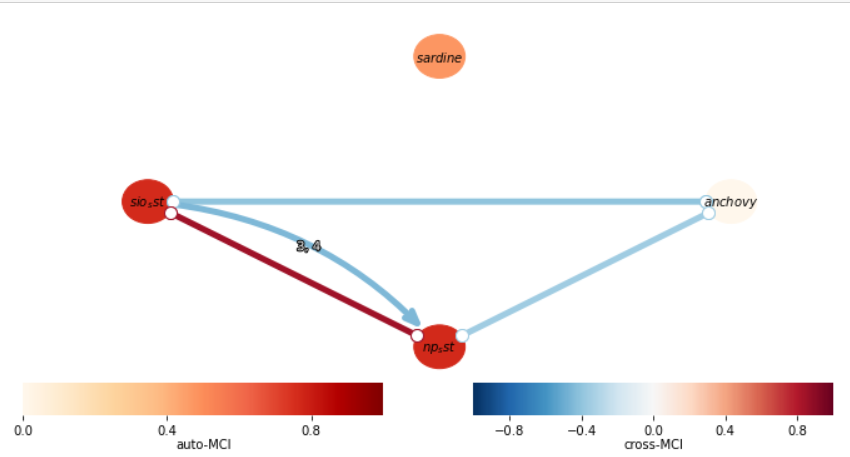
### And the second is the graph with passing a single pc_alpha value.
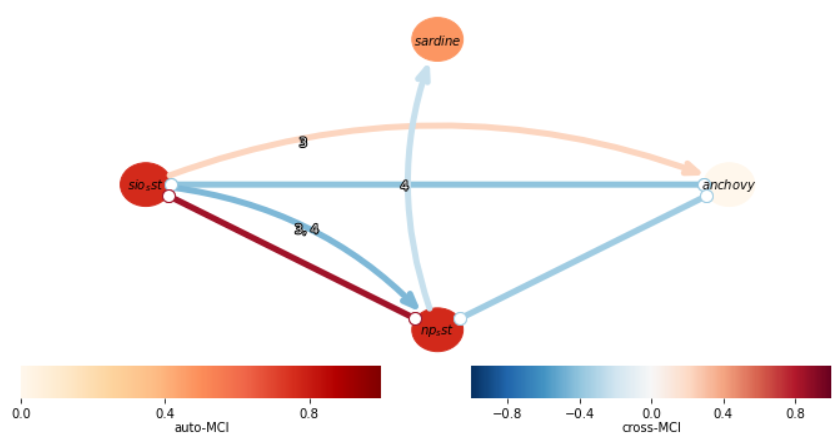

## 3. Manually Tune

### Since we can not make sure whether it is fine to use different criterions for variables, we tried to change pc_alpha manually.

In [ ]:
# Detect network entropy variability with tuning tau_max and pc_alpha

for tau_var in range(0, 11):
    # construct mci_sum set
    mcisum = []
    for alpha in np.linspace(0.01, 0.11, 10, endpoint=False):
        results = pcmci.run_pcmci(tau_max=tau_var, alpha_level=0.1, pc_alpha=alpha)
        mci_all = results['val_matrix'].round(2)
        mci_var = []
        for i in range(len(mci_all)):
            mci_var.append(np.mean(mci_all[i], axis=1))
        mci_var = np.array(mci_var)
        # see mci_matrix
        print(mci_var)
        # compute sum of mci
        mcisum.append(np.sum(mci_var))
    # plot variability of mci_sum with different pc_alpha
    plt.plot(np.linspace(0.01, 0.11, 10, endpoint=False), mcisum)
    plt.title('sum of MCI variability with tau_max=%s'%tau_var)
    plt.xlabel('pc_alpha')
    plt.ylabel('sum of MCI')
    plt.show()

### Here are the pics we get.
### P.S: Here, the "sum of mci variability with different tau_max = " means the variability of MCI_SUMMATION with different tau_max.
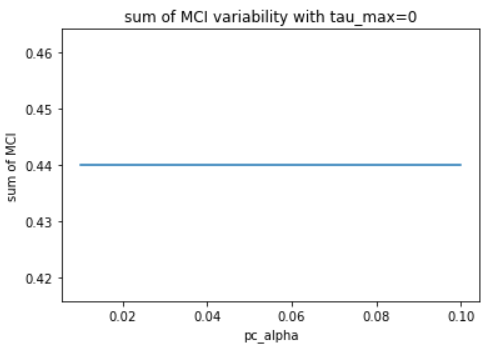
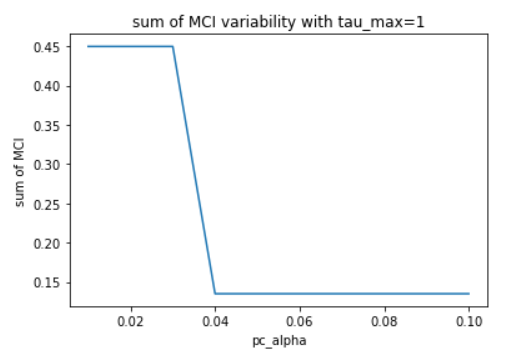
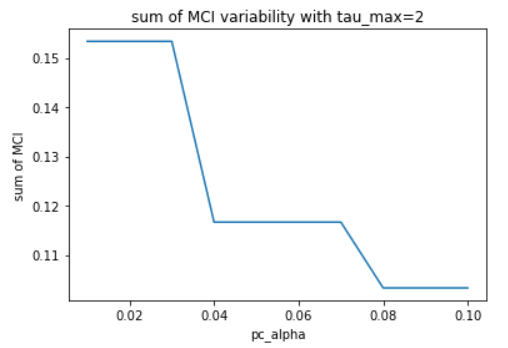
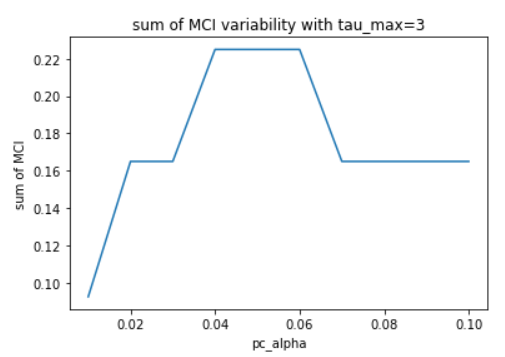
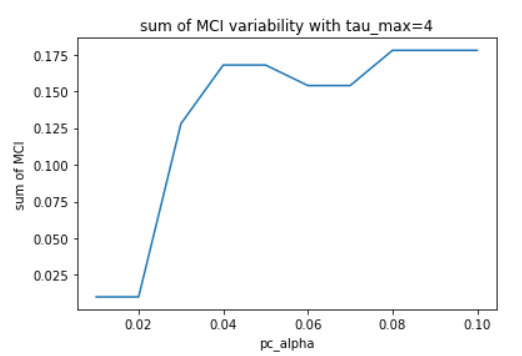
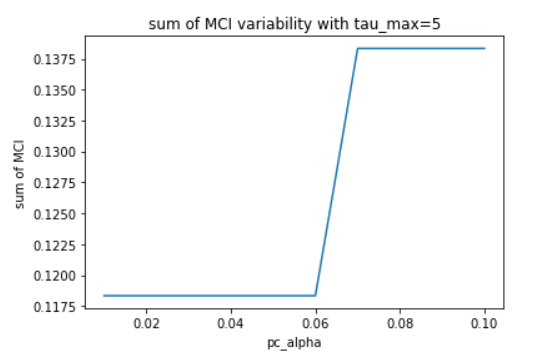
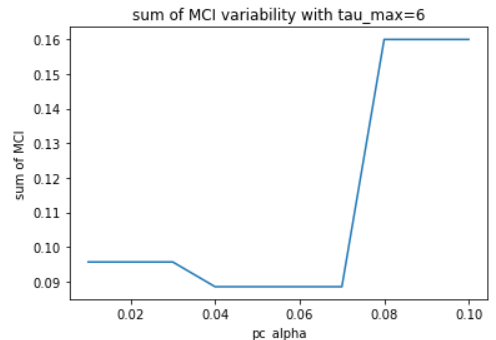
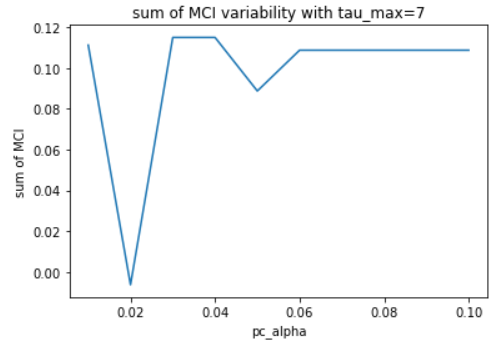
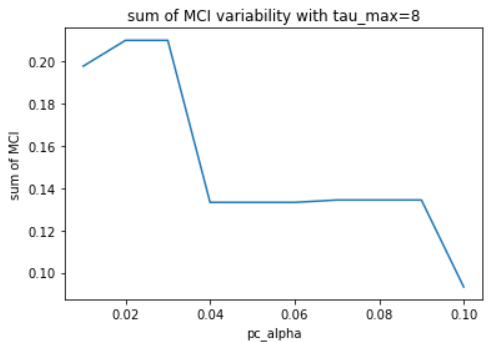
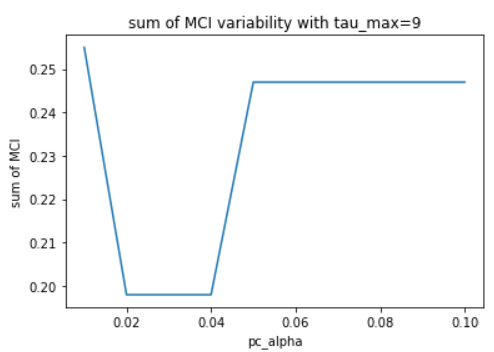
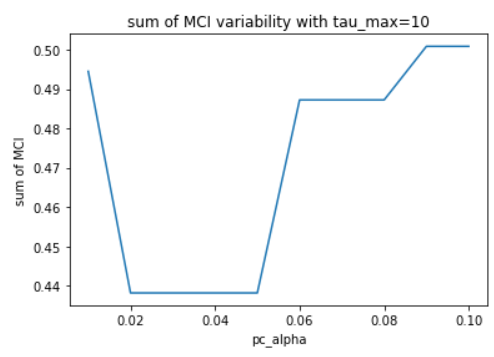
### And the Total picture
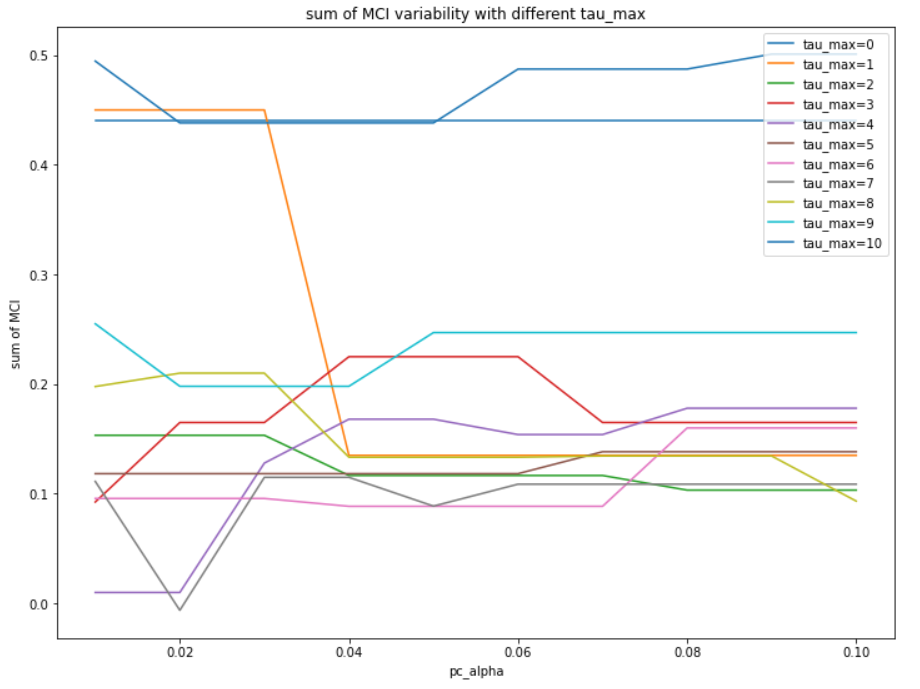